# Fundamentos de la Programación (Grado en Ingeniería de la Salud)
## Ejercicio "Aguas en explotaciones agrícolas" (14 de enero de 2020) - Grupo 1

Antes de empezar, ejecutaremos la siguiente celda con las importaciones necesarias para poder realizar el ejercicio:

In [1]:
import csv
from datetime import datetime
from matplotlib import pyplot as plt
from collections import namedtuple

## 1. Carga de datos (0.5 puntos)

Tomaremos la información de un fichero de entrada llamado <code>aguas_explotaciones_agricolas.csv</code> en el que se encuentran registrados datos de las cantidades de agua utilizadas en distintos tipos de cultivo, organizadas por comunidades autónomas y por años, desde el año 2000 hasta el 2016. El fichero se encuentra en la carpeta <code>./data</code>. Cada línea del fichero de entrada contiene las siguientes informaciones:

- **C.A.:** Nombre de la comunidad autónoma
- **Año:** Año en el que se registró la cantidad de agua (entre 2000 y 2016)
- **Tipo de cultivo** Nombre del tipo de cultivo
- **Litros:** Número entero con los litros gastados en el tipo de cultivo, año y comunidad autónoma de la misma línea


He aquí un fragmento con las primeras líneas del fichero de entrada:

<img src="./img/fichero.jpg" alt="Drawing" style="width:10cm;"/>
    
La primera función que implementaremos será la de lectura. Será la encargada de leer los datos del fichero de entrada y cargarlos en una lista de tuplas:

In [2]:
Aguas = namedtuple('Aguas', 'comunidad año tipo litros')

def lee_aguas(fichero):
    ''' Lee el fichero de entrada y devuelve una lista de registros
    
    ENTRADA:
       - fichero: nombre del fichero de entrada
    SALIDA:
       - lista de registros -> [Aguas(str, int, str, int)]
    '''
    registros = []
    with open(fichero, 'r', encoding='utf-8') as f:
        lector = csv.reader(f)
        next(lector)
        registros = [Aguas(comunidad, int(año), tipo, int(litros))
                       for comunidad, año, tipo, litros in lector]
    return registros

In [3]:
# TEST de 'lee_aguas', la salida esperada es:
# 935 [Aguas(comunidad='Andalucía', año=2000, tipo='Herbáceos', litros=997486), 
#Aguas(comunidad='Andalucía', año=2000, tipo='Frutales', litros=481004), 
#Aguas(comunidad='Andalucía', año=2000, tipo='Olivar y Viñedo', litros=441654)]

REGISTROS = lee_aguas('./datos/aguas_explotaciones_agricolas.csv')
print(len(REGISTROS), REGISTROS[:3])

935 [Aguas(comunidad='Andalucía', año=2000, tipo='Herbáceos', litros=997486), Aguas(comunidad='Andalucía', año=2000, tipo='Frutales', litros=481004), Aguas(comunidad='Andalucía', año=2000, tipo='Olivar y Viñedo', litros=441654)]


## 2. Consulta y filtrado (7.5 puntos)

Una vez que hemos cargado los datos en una estructura en memoria ya podemos empezar a procesarlos. En esta sección implementaremos algunas funciones de consulta y filtrado que nos permitirán trabajar con ellos.

La primera función se llama <code>gastos_por_cultivo_en_año</code> y devuelve una lista de tuplas con la comunidad, el tipo de cultivo y el gasto en litro de agua de un año concreto, recibido como parámetro:

In [4]:
def gastos_por_cultivo_en_año(registros,año):
    ''' Devuelve una lista de tuplas con la comunidad, el tipo de cultivo y el gasto en litro de agua de un año concreto,
        recibido como parámetro

    ENTRADA:
       - registros: lista de registros ->  [Aguas(str, int, str, int)]
       - año: valor del año -> int
    SALIDA:
       - lista de tuplas de tres valores ->  [(str, str, int)]
    '''
    return [(com,tipo,gasto) for com, a, tipo, gasto in registros if a==año]


In [5]:
# TEST de 'gastos_por_cultivo_en_año', la salida esperada es:
#[('Andalucía', 'Herbáceos', 1231579), ('Andalucía', 'Frutales', 904452), ('Andalucía', 'Olivar y Viñedo', 765116)]

print(gastos_por_cultivo_en_año(REGISTROS,2016)[:3])

[('Andalucía', 'Herbáceos', 1231579), ('Andalucía', 'Frutales', 904452), ('Andalucía', 'Olivar y Viñedo', 765116)]


La siguiente función es <code>mayor_gasto_en_comunidad</code>. La función toma una lista de registros y el nombre de una comunidad. Devuelve el registro con mayor gasto en litros de agua en dicha comunidad autónoma:

In [6]:
def mayor_gasto_en_comunidad(registros, comunidad=None):
    ''' Devuelve el registro con el mayor gasto de agua correspondiente a una comunidad. Su valor por defecto es None,
    y en ese caso se devolverá el registro con mayor gasto de todas las comunidades

    ENTRADA:
       - registros: lista de registros ->  [Aguas(str, int, str, int)]
       - comunidad: nombre de la comunidad -> str
    SALIDA:
       - registro con mayor gasto en una comunidad ->  Aguas(str, int, str, int)
    '''
    if comunidad is not None:
        registros = [r for r in registros if r.comunidad==comunidad]
    return max(registros,key=lambda r:r.litros)

A continuación se pide implementar en la siguiente celda dos llamadas de TEST a esta función:

In [7]:
# EJERCICIO: implementar dos llamadas de TEST de 'mayor_gasto_en_comunidad' que obtengan:
#   - El registro con mayor gasto de agua en todas las comunidades
#   - El registro con mayor gasto de agua en Andalucía

# Las salidas esperadas para estas consultas son:
#Aguas(comunidad='Aragón', año=2011, tipo='Herbáceos', litros=2221102)
#Aguas(comunidad='Andalucía', año=2008, tipo='Olivar y Viñedo', litros=1817248)

print(mayor_gasto_en_comunidad(REGISTROS))
print(mayor_gasto_en_comunidad(REGISTROS, 'Andalucía'))

Aguas(comunidad='Aragón', año=2011, tipo='Herbáceos', litros=2221102)
Aguas(comunidad='Andalucía', año=2008, tipo='Olivar y Viñedo', litros=1817248)


La siguiente función es <code>diferencia_anual_litros</code>. La función toma una lista de registros,  el nombre de una comunidad, y un tipo de cultivo. Devuelve una lista de tuplas, constando cada tupla de dos años consecutivos y la variación en el número de litros entre esos dos años:

In [8]:
def diferencia_anual_litros(registros,comunidad,tipo):
    '''
    Calcula las variaciones anuales del número de libros para un tipo de cultivo y en una
    comunidad determinada. La función devuelve una lista de tuplas, constando cada tupla
    de dos años consecutivos y la variación en el número de litros entre esos años.
    
    La lista de tuplas debe estar ordenada cronológicamente.
    
    ENTRADA:
     - registros: lista de registros ->  [Aguas(str, int, str, int)]
     - comunidad: nombre de una comunidad -> str
     - tipo: nombre de un tipo de cultivo -> str

    SALIDA:
     - lista de tuplas (año_1, año_2, variación), siendo año_1 y año_2 dos años consecutivos
     y variación la variación en el número de litros para esos años. La lista debe estar ordenada
     cronológicamente (es decir, de menor a mayor año). -> [(int, int, int)]
    '''
    litros_por_año = [(r.año,r.litros) for r in registros if r.comunidad==comunidad and r.tipo==tipo]
    return [(t1[0],t2[0],t2[1]-t1[1]) for t1,t2 in zip(litros_por_año[:-1],litros_por_año[1:])]

In [9]:
# TEST de 'diferencia_anual_litros', la salida esperada es:
#Mostrando incrementos y decrementos interanuales en el número de litros empleados en Andalucía para Olivar y Viñedo:

#2000 -> 2001: 133809
#2001 -> 2002: 14722
#2002 -> 2003: -33746
#2003 -> 2004: 1080180
#2004 -> 2005: -383003
#2005 -> 2006: 214268
#2006 -> 2007: 346370
#2007 -> 2008: 2994
#2008 -> 2009: -241650
#2009 -> 2010: 26676
#2010 -> 2011: -421550
#2011 -> 2012: -316209
#2012 -> 2013: 171985
#2013 -> 2014: -84818
#2014 -> 2015: -123106
#2015 -> 2016: -63460

print('Mostrando incrementos y decrementos interanuales en el número de litros empleados en Andalucía para Olivar y Viñedo:\n')
for a1, a2, variacion in diferencia_anual_litros(REGISTROS, 'Andalucía', 'Olivar y Viñedo'):
    print('{:} -> {:}: {:}'.format(a1, a2, variacion))

Mostrando incrementos y decrementos interanuales en el número de litros empleados en Andalucía para Olivar y Viñedo:

2000 -> 2001: 133809
2001 -> 2002: 14722
2002 -> 2003: -33746
2003 -> 2004: 1080180
2004 -> 2005: -383003
2005 -> 2006: 214268
2006 -> 2007: 346370
2007 -> 2008: 2994
2008 -> 2009: -241650
2009 -> 2010: 26676
2010 -> 2011: -421550
2011 -> 2012: -316209
2012 -> 2013: 171985
2013 -> 2014: -84818
2014 -> 2015: -123106
2015 -> 2016: -63460


La siguiente función se llama <code>gasto_por_comunidad_y_año</code>. Toma como entrada una lista de registros, y produce como salida un diccionario cuyas claves son las comunidades, y los valores son listas de tuplas que contienen cada año y el gasto en litros de ese año. La lista de cada comunidad estará ordenada en orden ascendente del año.

In [10]:
def gasto_por_comunidad_y_año(registros):
    ''' 
    Crea un diccionario donde las claves son las comunidades y los valores asociados 
    son listas de tuplas que contienen cada año y el gasto en litros de ese año.
    La lista de cada comunidad estará ordenada en orden ascendente del año.
    
    ENTRADA:
       - registros: lista de registros ->  [Aguas(str, int, str, int)]
    SALIDA:
       - diccionario con el gasto anual por comunidad -> {str: [(int,int)]}
    '''
    comunidades = {r.comunidad for r in registros}
    años = {r.año for r in registros}
    gastos = {}
    for c in comunidades:
        gastos[c] = [(a,sum(r.litros for r in registros if r.comunidad==c and r.año==a)) for a in años]
        gastos[c].sort()
    return gastos

In [11]:
# TEST de 'gasto_por_comunidad_y_año', la salida esperada es:
#Gastos totales anuales para la Región de Murcia:

#[(2000, 496364), (2001, 563734), (2002, 629710), (2003, 614442), (2004, 619956), (2005, 563066),
#(2006, 527511), (2007, 551803), (2008, 521744), (2009, 526051), (2010, 507840), (2011, 574697),
#(2012, 587658), (2013, 531099), (2014, 609319), (2015, 544267), (2016, 531117)]

print('Gastos totales anuales para la Región de Murcia: ')
print(gasto_por_comunidad_y_año(REGISTROS)['Región de Murcia'])

Gastos totales anuales para la Región de Murcia: 
[(2000, 496364), (2001, 563734), (2002, 629710), (2003, 614442), (2004, 619956), (2005, 563066), (2006, 527511), (2007, 551803), (2008, 521744), (2009, 526051), (2010, 507840), (2011, 574697), (2012, 587658), (2013, 531099), (2014, 609319), (2015, 544267), (2016, 531117)]


## 3. Visualización (2 puntos)

The display function that we will implement will be <code>sample_evolution_expenditure_community</code>. It takes as input a list of water usage records and the name of a community. It shows a bar chart with the evolution of water consumption in liters for said community, taking into account all types of crops. The $X$ axis shows the different years and the $Y$ axis shows the total water consumption for each year.

In [16]:
def muestra_evolucion_gasto_comunidad(registros,comunidad):
    '''
    Draw a bar graph that shows the evolution of water use per year
     for a given community.
    
     ENTRY:
      - records: list of records -> [Waters(str, int, str, int)]
      - community: name of a community -> str
     
     SCREEN OUTPUT:
         - bar chart with the evolution of the number of liters (Y axis) per year (X axis)
           
     The following matplotlib instructions will be used to generate the plot:
         plt.title('Number of liters per year for ' + community)
         plt.bar(range(len(number_liters)), number_liters, tick_label=years)
         plt.xticks(rotation=75)
         plt.show()
            
     Where the two variables used mean the following:
         - years: list with the values of the years, sorted from smallest to largest
         - numero_litros: list aligned with the previous one, with the number of liters
         spent in the given community in each year.
    '''
    años = sorted({r.año for r in registros if r.comunidad==comunidad})
    numero_litros = []
    for a in años:
        numero_litros.append(sum(r.litros for r in registros if r.comunidad==comunidad and r.año==a))
    
    plt.title('Número de litros por año para ' + comunidad)
    plt.bar(range(len(numero_litros)), numero_litros, tick_label=años)
    plt.xticks(rotation=75)
    plt.show()

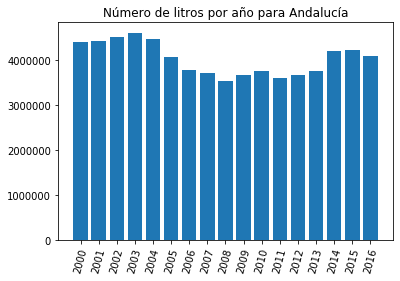

In [17]:
muestra_evolucion_gasto_comunidad(REGISTROS,'Andalucía')

La salida de la celda de test debería ser la siguiente: